By `nt.cpp` (nt: no torch)

parameters:
```cpp
Cubic cubic(1e5, 2, 50, 5, 1, 1e-26, 300);
num_steps = 1000;
sampling_step = 1;
```

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data_pure.csv', header=None)
mean = data.groupby(0).mean()

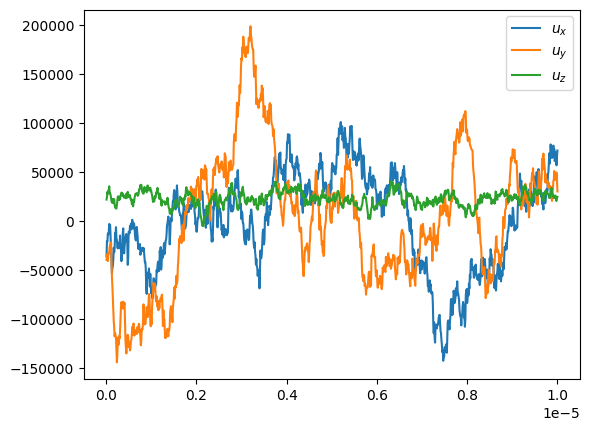

In [32]:
plt.plot(mean[4], label='$u_x$')
plt.plot(mean[5], label='$u_y$')
plt.plot(mean[6], label='$u_z$')
plt.legend()

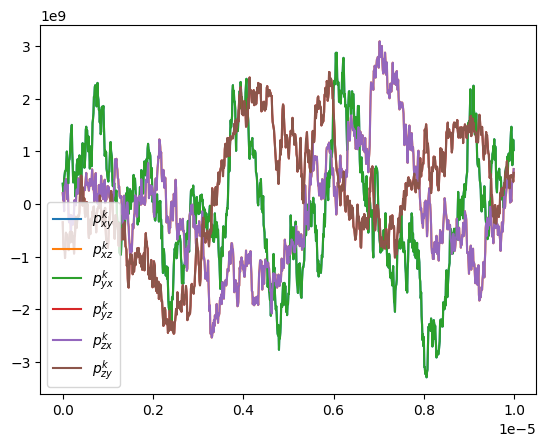

In [33]:
dt = 1e-8
time = np.arange(0, mean.shape[0], 1) * dt
# plt.yscale('log')
plt.plot(time, mean[8], label='$p^k_{xy}$')
plt.plot(time, mean[9], label='$p^k_{xz}$')
plt.plot(time, mean[10], label='$p^k_{yx}$')
plt.plot(time, mean[12], label='$p^k_{yz}$')
plt.plot(time, mean[13], label='$p^k_{zx}$')
plt.plot(time, mean[14], label='$p^k_{zy}$')
plt.legend()

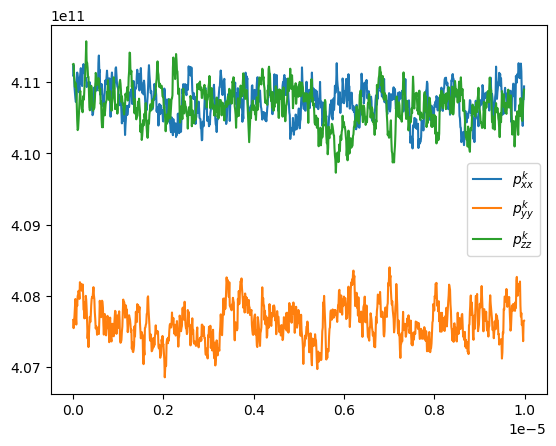

In [34]:
plt.plot(time, mean[7], label='$p^k_{xx}$')
plt.plot(time, mean[11], label='$p^k_{yy}$')
plt.plot(time, mean[15], label='$p^k_{zz}$')
plt.legend()

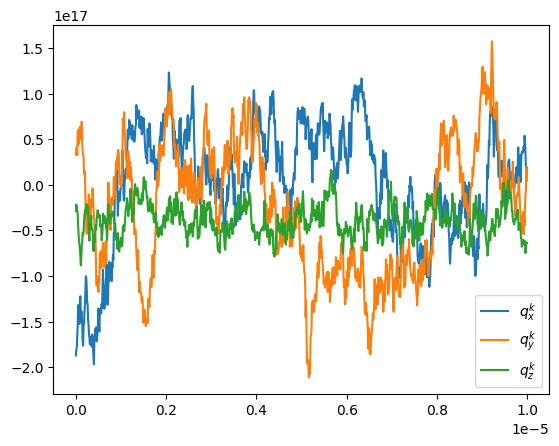

In [35]:
plt.plot(time, mean[16], label='$q^k_{x}$')
plt.plot(time, mean[17], label='$q^k_{y}$')
plt.plot(time, mean[18], label='$q^k_{z}$')
plt.legend()

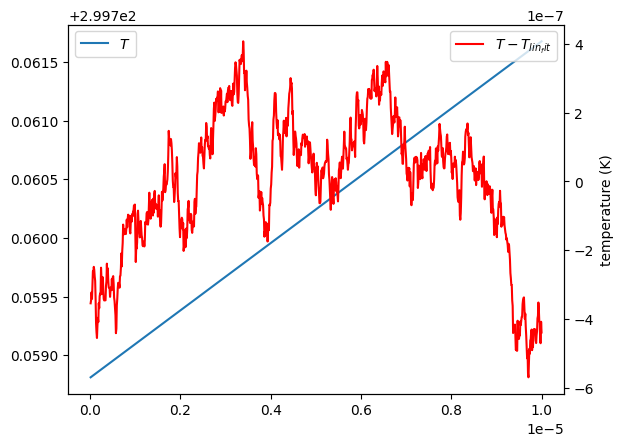

In [46]:
Ts = pd.read_csv('data_Ts_pure.csv', header=None)
fig, ax1 = plt.subplots()
ax1.plot(Ts[0], Ts[1], label='$T$')
ax2 = ax1.twinx()
plt.xlabel('time (s)')
plt.ylabel('temperature (K)')
# linear regression using numpy
A = np.vstack([Ts[0], np.ones(len(Ts[0]))]).T
m, c = np.linalg.lstsq(A, Ts[1], rcond=None)[0]
ax2.plot(Ts[0], Ts[1]-m*Ts[0]-c, 'r', label='$T - T_{lin_fit}$')
# plt.ylim(Ts[1].min(), Ts[1].max())
ax1.legend()
ax2.legend()